# Introduction to Diffusion MRI

## What is diffusion?

## Why is the diffusion of water in the brain interesting?

## Measuring diffusion with MRI

## Typical Diffusion Weighted Imaging (DWI) Protocol

## Diffusion Weighted Imaging (DWI)

Diffusion imaging probes the random, microscopic motion of water protons by employing MRI sequences which are sensitive to the geometry and environmental organization surrounding the water protons. This is a popular technique for studying the white matter of the brain. The diffusion within biological structures, such as the brain, are often restricted due to barriers (eg. cell membranes), resulting in a preferred direction of diffusion (anisotropy). A typical diffusion MRI scan will acquire multiple volumes that are sensitive to a particular diffusion direction and result in diffusion-weighted images (DWI). Diffusion that exhibits directionality in the same direction result in an attenuated signal. With further processing, the acquired images can provide measurements which are related to the microscopic changes and estimate white matter trajectories. Images with no diffusion weighting are also acquired as part of the acquisition protocol.

![fiber_configurations](../images/DiffusionDirections.png)
Diffusion along X, Y, and Z directions

## Diffusion Gradient Scheme

The diffusion-weighted gradient scheme is essential for pre-processing DWI data.

In addition to the acquired diffusion images, two files are collected as part of the diffusion dataset. These files correspond to the gradient amplitude (b-values) and directions (b-vectors) of the diffusion measurement and are named with the extensions `.bval` and `.bvec` respectively. The b-value is the diffusion-sensitizing factor, and reflects the timing & strength of the gradients used to acquire the diffusion-weighted images. The b-vector corresponds to the direction of the diffusion sensitivity. Together these two files define the diffusion MRI measurement as a set of gradient directions and corresponding amplitudes.

### FSL format

This format consists of a pair of ASCII text files, typically named `.bvec` & `.bval`. The bvals file consists of a single row of space-separated floating-point values, all in one row, with one value per volume in the DWI dataset. The bvecs file consists of 3 rows of space-separated floating-point values, with the first row corresponding to the x-component of the DW gradient vectors, one value per volume in the dataset; the second row corresponding to the y-component, and the third row to the z-component. A typical pair of FSL format DW gradient files might look like:

In [11]:
from dipy.io.gradients import read_bvals_bvecs
from dipy.core.gradients import gradient_table

In [22]:
dwi = "../../data/sub-01_ses-01_dwi.nii.gz"
bvec = "../../data/sub-01_ses-01_dwi.bvec"
bval = "../../data/sub-01_ses-01_dwi.bval"

gt_bvals, gt_bvecs = read_bvals_bvecs(bval, bvec)

In [3]:
!cat ../../data/sub-01_ses-01_dwi.bvec

0 0 0 0 0 -1 -0.361 0.255 -0.861 0.307 0.736 -0.532 -0.177 -0.771 -0.079 -0.109 -0.302 0.464 0.464 0.529 0.825 -0.697 -0.479 0.213 0.648 -0.58 0.729 -0.963 -0.229 0.016 -0.359 -0.806 0.045 0.177 -0.946 0.318 0.312 0.284 0.421 0.963 0.881 -0.758 0.684 -0.932 0.648 -0.773 -0.276 0.555 -0.007 -0.919 0.223 0.544 -0.867 -0.534 0.001 0.611 -0.691 -0.731 -0.024 -0.453 -0.432 0.87 -0.283 -0.088 0.016
0 0 0 0 0 0 0.933 0.565 -0.464 -0.766 0.013 0.343 0.965 0.163 -0.996 -0.92 -0.779 -0.46 0.839 0.014 -0.54 -0.287 -0.338 -0.851 0.736 0.745 0.197 -0.264 0.507 0.171 -0.932 -0.422 0.087 0.841 0.315 0.257 0.165 -0.2 -0.093 -0.02 0.161 -0.45 0.72 0.229 -0.252 0.61 -0.533 0.591 0.715 -0.07 -0.589 -0.73 -0.477 -0.554 0.726 -0.791 0.503 0.475 -0.38 0.646 -0.82 -0.289 0.912 0.393 -0.964
0 0 0 0 0 0 0 0.785 0.21 0.564 0.677 0.774 0.195 0.615 -0.036 -0.376 -0.549 0.757 0.284 -0.849 -0.167 -0.657 -0.81 -0.48 -0.195 0.33 -0.656 0.054 0.831 -0.985 0.051 -0.415 0.995 -0.511 -0.068 -0.912 0.936 -0.938 0.902 0.27

In [13]:
print("bvecs:\n", gt_bvecs)

bvecs:
 [[ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [-1.     0.     0.   ]
 [-0.361  0.933  0.   ]
 [ 0.255  0.565  0.785]
 [-0.861 -0.464  0.21 ]
 [ 0.307 -0.766  0.564]
 [ 0.736  0.013  0.677]
 [-0.532  0.343  0.774]
 [-0.177  0.965  0.195]
 [-0.771  0.163  0.615]
 [-0.079 -0.996 -0.036]
 [-0.109 -0.92  -0.376]
 [-0.302 -0.779 -0.549]
 [ 0.464 -0.46   0.757]
 [ 0.464  0.839  0.284]
 [ 0.529  0.014 -0.849]
 [ 0.825 -0.54  -0.167]
 [-0.697 -0.287 -0.657]
 [-0.479 -0.338 -0.81 ]
 [ 0.213 -0.851 -0.48 ]
 [ 0.648  0.736 -0.195]
 [-0.58   0.745  0.33 ]
 [ 0.729  0.197 -0.656]
 [-0.963 -0.264  0.054]
 [-0.229  0.507  0.831]
 [ 0.016  0.171 -0.985]
 [-0.359 -0.932  0.051]
 [-0.806 -0.422 -0.415]
 [ 0.045  0.087  0.995]
 [ 0.177  0.841 -0.511]
 [-0.946  0.315 -0.068]
 [ 0.318  0.257 -0.912]
 [ 0.312  0.165  0.936]
 [ 0.284 -0.2   -0.938]
 [ 0.421 -0.093  0.902]
 [ 0.963 -0.02   0.271]
 [ 0.881  0.161  0.444]
 [-0.758

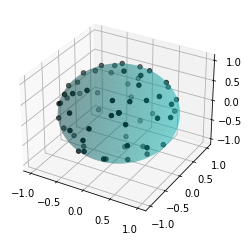

In [70]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib inline

r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0:pi:100j, 0:2*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(x, y, z, rstride=1, cstride=1, color="c", alpha=0.3, linewidth=0)
ax.scatter(gt_bvecs.T[0], gt_bvecs.T[1], gt_bvecs.T[2], color="k", s=20)



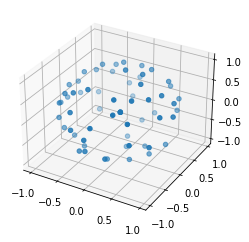

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(gt_bvecs.T[0], gt_bvecs.T[1], gt_bvecs.T[2])
plt.show()

In [5]:
!cat ../../data/sub-01_ses-01_dwi.bval

0 0 0 0 0 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000


In [14]:
print("bvecs:\n", gt_bvals)

bvecs:
 [   0.    0.    0.    0.    0. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000.]


It is important to note that in this format, the gradient vectors are provided with respect to the image axes, not in real or scanner coordinates (actually, it’s a little bit more complicated than that, refer to the FSL wiki for details). This is a rich source of confusion, since seemingly innocuous changes to the image can introduce inconsistencies in the b-vectors. For example, simply reformatting the image from sagittal to axial will effectively rotate the b-vectors, since this operation changes the image axes. It is also important to remember that a particular bvals/bvecs pair is only valid for the particular image that it corresponds to.

### RASB+ format

Inspired by MRtrix3 and the [BIDS spec](https://github.com/bids-standard/bids-specification/issues/349).

One row per DWI volume, with each row consisting of 4 space-separated floating-point values; these correspond to [x y z b], where [x y z] are the components of the gradient vector, and b is the b-value in units of s/mm2.

In [20]:
from dmriprep.utils.vectors import DiffusionGradientTable

In [30]:
gtab = DiffusionGradientTable(dwi_file=dwi, bvecs=bvec, bvals=bval)

In [44]:
gtab._bvecs

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-3.6085388e-01,  9.3262237e-01,  0.0000000e+00],
       [ 2.5493947e-01,  5.6486589e-01,  7.8481364e-01],
       [-8.6069149e-01, -4.6383372e-01,  2.0992474e-01],
       [ 3.0713812e-01, -7.6634455e-01,  5.6425375e-01],
       [ 7.3592865e-01,  1.2998740e-02,  6.7693436e-01],
       [-5.3206682e-01,  3.4304306e-01,  7.7409714e-01],
       [-1.7694879e-01,  9.6472073e-01,  1.9494356e-01],
       [-7.7129507e-01,  1.6306238e-01,  6.1523539e-01],
       [-7.9017669e-02, -9.9622267e-01, -3.6008045e-02],
       [-1.0901869e-01, -9.2015779e-01, -3.7606448e-01],
       [-3.0208367e-01, -7.7921587e-01, -5.4915214e-01],
       [ 4.6401274e-01, -4.6001

In [71]:
from dipy.data import get_fnames

In [72]:
fraw, fbval, fbvec = get_fnames("taiwan_ntu_dsi")

Download Progress: [########################################] 100.00%  of 0.00 MB

In [75]:
np.genfromtxt(fbvec)

array([[ 0.    ,  0.2756, -0.0232, -0.0207,  0.0206,  0.0231, -0.2757,
         0.2524,  0.2549,  0.2962,  0.2987, -0.0439, -0.0025,  0.0024,
         0.0438, -0.2988, -0.2963, -0.255 , -0.2525,  0.2317,  0.2731,
         0.278 ,  0.3194, -0.3195, -0.2781, -0.2732, -0.2318,  0.5512,
        -0.0463, -0.0414,  0.0413,  0.0462, -0.5513,  0.528 ,  0.5305,
         0.5718,  0.5743,  0.2293,  0.2342,  0.3169,  0.3218, -0.067 ,
        -0.0257, -0.0645,  0.0182, -0.0183,  0.0644,  0.0256,  0.0669,
        -0.3219, -0.317 , -0.2343, -0.2294, -0.5744, -0.5719, -0.5306,
        -0.5281,  0.5073,  0.5487,  0.5536,  0.595 ,  0.2086,  0.2499,
         0.2111,  0.2938,  0.2574,  0.3401,  0.3012,  0.3425, -0.3426,
        -0.3013, -0.3402, -0.2575, -0.2939, -0.2112, -0.25  , -0.2087,
        -0.5951, -0.5537, -0.5488, -0.5074,  0.5049,  0.5098,  0.5925,
         0.5975, -0.0877, -0.005 ,  0.0049,  0.0876, -0.5976, -0.5926,
        -0.5099, -0.505 ,  0.8268,  0.4842,  0.5256,  0.4867,  0.5694,
      

In [76]:
np.genfromtxt(fbval)

array([   0.,  308.,  308.,  308.,  308.,  308.,  308.,  615.,  615.,
        615.,  615.,  615.,  615.,  615.,  615.,  615.,  615.,  615.,
        615.,  923.,  923.,  923.,  923.,  923.,  923.,  923.,  923.,
       1231., 1231., 1231., 1231., 1231., 1231., 1538., 1538., 1538.,
       1538., 1538., 1538., 1538., 1538., 1538., 1538., 1538., 1538.,
       1538., 1538., 1538., 1538., 1538., 1538., 1538., 1538., 1538.,
       1538., 1538., 1538., 1846., 1846., 1846., 1846., 1846., 1846.,
       1846., 1846., 1846., 1846., 1846., 1846., 1846., 1846., 1846.,
       1846., 1846., 1846., 1846., 1846., 1846., 1846., 1846., 1846.,
       2462., 2462., 2462., 2462., 2462., 2462., 2462., 2462., 2462.,
       2462., 2462., 2462., 2769., 2769., 2769., 2769., 2769., 2769.,
       2769., 2769., 2769., 2769., 2769., 2769., 2769., 2769., 2769.,
       2769., 2769., 2769., 2769., 2769., 2769., 2769., 2769., 2769.,
       2769., 2769., 2769., 2769., 2769., 2769., 3077., 3077., 3077.,
       3077., 3077.,